### Introduction
The Boston Housing Study dataset has 506 observations and 13 columns. The response variable is the median value of homes in several neighborhoods. Neighborhood category variable was dropped when we prepared data for regression analysis.  We need to use various regression models to determine the overall performance in terms of root-mean-squared error and recommend the best performer to management.

In [1]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# Execute the code line by line in jupyter-notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score 
from math import sqrt  # for root mean-squared error calculation

In [2]:
# read data for the Boston Housing Study
boston_input = pd.read_csv('boston.csv')

In [3]:
# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first five rows):')
boston_input.head()


boston DataFrame (first five rows):


,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
# look at the list of column names
# show the data types, missing values,
print('\nGeneral description of the boston_input DataFrame:')
boston_input.info()


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.4+ KB


In [5]:
# drop neighborhood from the data being considered
# response variable is house median value
boston = boston_input.drop('neighborhood', 1)

In [6]:
print('\nDescriptive statistics of the boston DataFrame:')
boston.describe()


Descriptive statistics of the boston DataFrame:


,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Data Exploration & Visualization

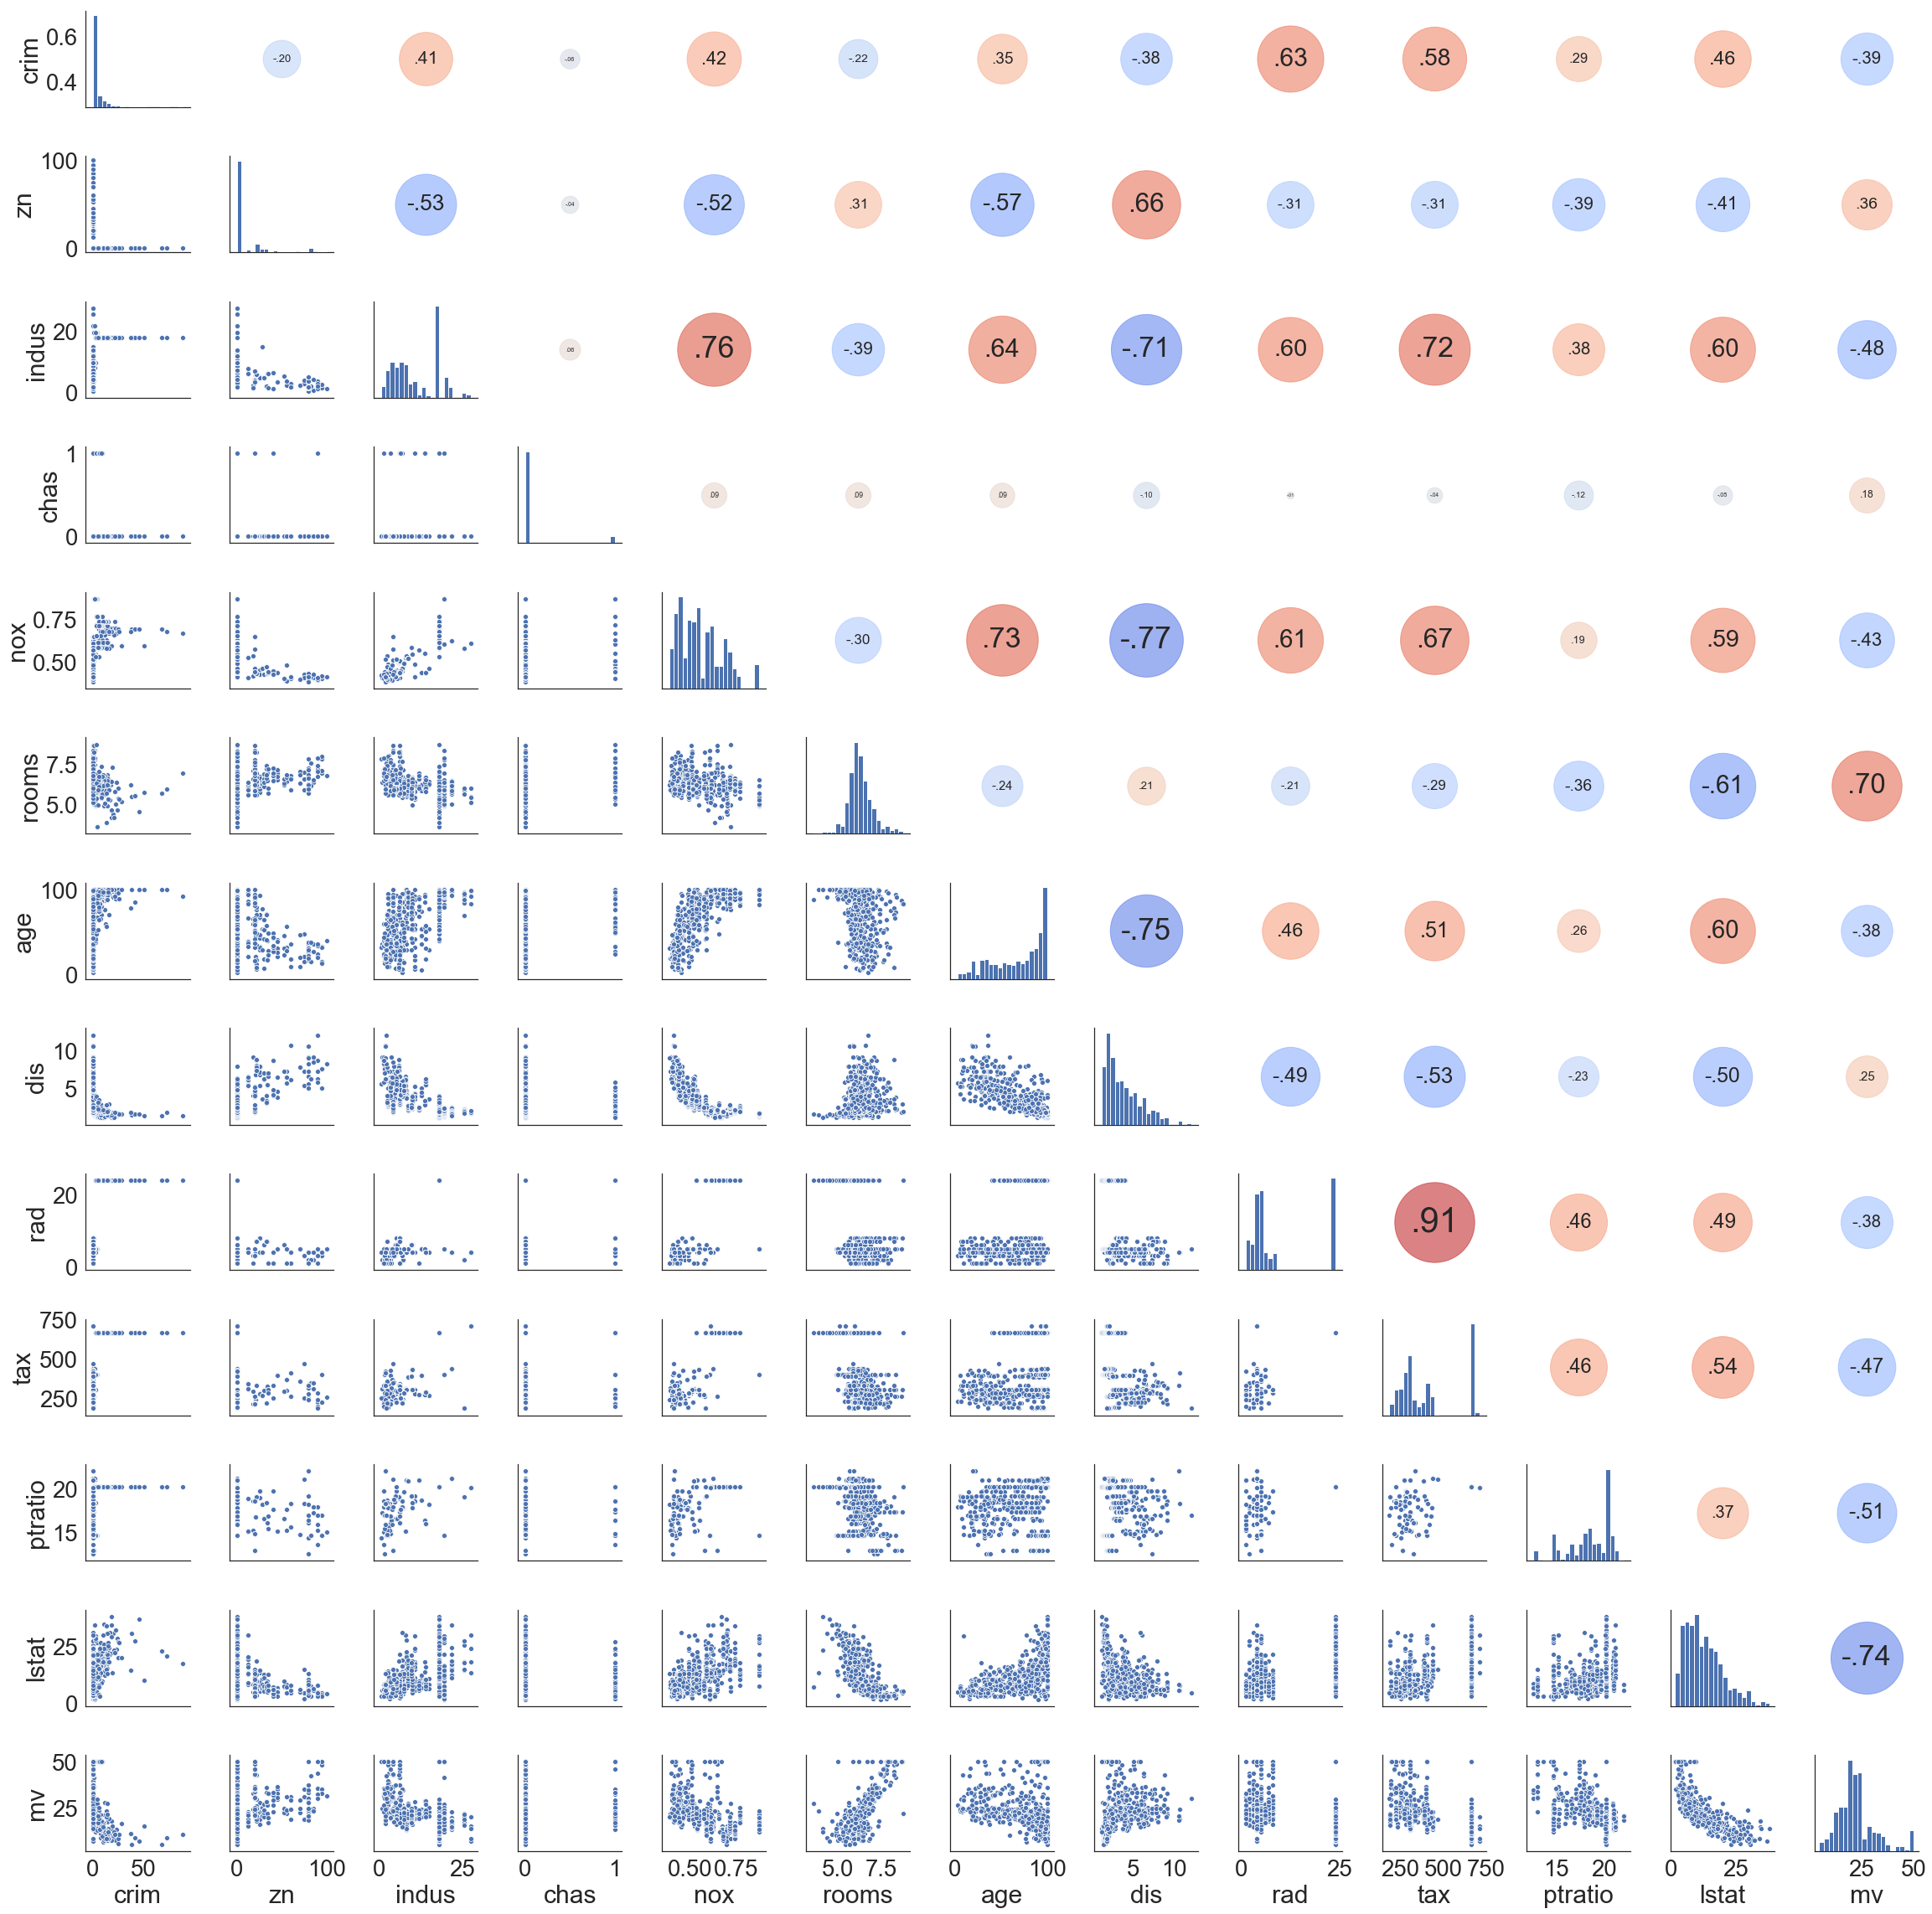

In [7]:
# data correlation (scatterplot) and distribution (histogram)
## sns.set(font_scale = 1.5); sns.pairplot(boston, height = 2.5);

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)
    
sns.set(font_scale = 2.5, style='white')
g = sns.PairGrid(boston, diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_diag(plt.hist, bins = 20)
g.map_upper(corrdot);

**Observed correlations:** <br>
nox (air pollution) vs. age (pre-1940 built houses in perecentage): positive correlation 0.73 <br>
nox (air pollution) vs. dis (avg. commute to work): negative correlation -0.77 <br>
dis (avg. commute to work) vs. indus (industrial perecentage): negative correlation -0.71 <br>
dis (avg. commute to work) vs. nox (air pollution): negative correlation -0.77 <br>
rad (highway access) vs. tax (tax rate): positive correlation 0.91 <br>
rooms (number of avg. rooms) vs. lstat (poverty rate): negative correlation -0.61 <br>
*response veriable* <br>
mv (median house value) vs. lstat (poverty rate): negative correlation -0.74 <br>
mv (median house value) vs. rooms (number of avg. rooms): positive correlation 0.70 <br>


**Observed distribution:** <br>
The crime rate, zoned land lots, waterfront property (Charles River), average commute rate, and poverty rate have outliers, and they are right-skewed. <br>
There are less higher crime rates. Crime rates are concentrated around the low end. <br>
There are less zoned land lots. <br>
There are more shorter average commutes than longer ones. People leave closer to work. <br>


### Data Preparation for Modeling

In [8]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [9]:
# standard scores for the columns... along axis 0
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
scaler.mean_
scaler.scale_

StandardScaler(copy=True, with_mean=True, with_std=True)


array([2.25288538e+01, 3.61352356e+00, 1.13636364e+01, 1.11367787e+01,
       6.91699605e-02, 5.54695059e-01, 6.28463439e+00, 6.85749012e+01,
       3.79504269e+00, 9.54940711e+00, 4.08237154e+02, 1.84555336e+01,
       1.26530632e+01])

array([9.17309810e+00, 8.59304135e+00, 2.32993957e+01, 6.85357058e+00,
       2.53742935e-01, 1.15763115e-01, 7.01922514e-01, 2.81210326e+01,
       2.10362836e+00, 8.69865112e+00, 1.68370495e+02, 2.16280519e+00,
       7.13400164e+00])


Dimensions for model_data: (506, 13)


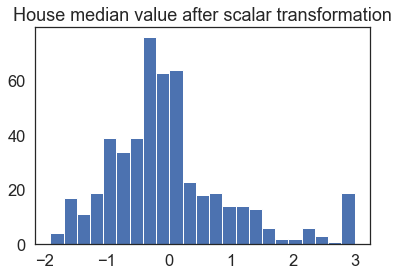

In [10]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)

# response veriable after scalar transformation
sns.set(font_scale = 1.5, style='white')
plt.hist(model_data[:,0], bins = 'auto')
plt.title('House median value after scalar transformation');

### Model Exploration

In [11]:
# here we split our data into training and testing sets
X = model_data[:,1:] #changed to 1 until end, also changed from prelim_model to model
y = model_data[:,0] #first column is responses, also changed from prelim_model to model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = RANDOM_SEED)

In [12]:
# list of regression model names
names = ['Linear Regression', 'Ridge Regression: alpha = 1', 'Lasso Regression: alpha = 0.1', 'ElasticNet Regression: alpha = 0.1'] 

# list of regressors
regressors = [LinearRegression(),
              Ridge(alpha = 1, solver = 'cholesky', 
                     fit_intercept = True, 
                     normalize = False, 
                     random_state = RANDOM_SEED),
              Lasso(alpha = 0.1,
                     fit_intercept = True, 
                     random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.1, 
                          fit_intercept = True, 
                          normalize = False, 
                          random_state = RANDOM_SEED),]

,Regression,Training RMSE,Test RMSE,Training R-Square,Test R-Square
,Linear Regression,0.524,0.591,0.682,0.417
,Ridge Regression: alpha = 1,0.523,0.584,0.682,0.447
,Lasso Regression: alpha = 0.1,0.577,0.590,0.626,0.638
,ElasticNet Regression: alpha = 0.1,0.564,0.572,0.638,0.616


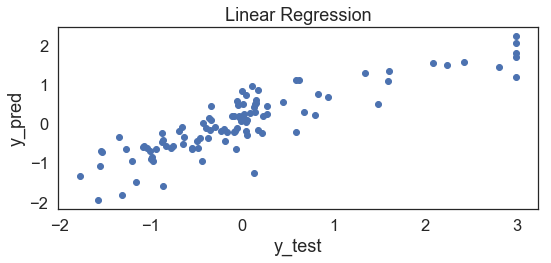

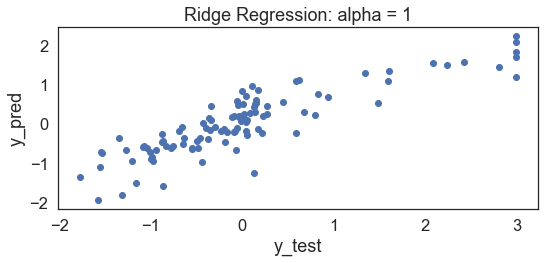

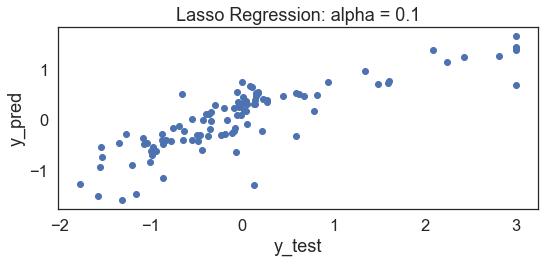

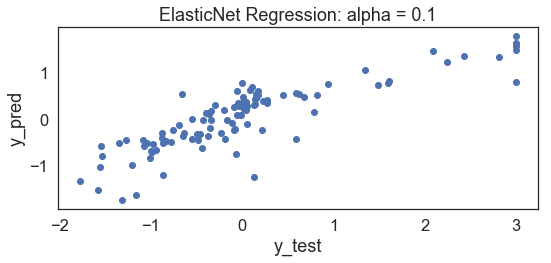

In [13]:
# ten-fold cross-validation
# set up numpy array for storing results

perf_table = pd.DataFrame()

for name, reg_model in zip(names, regressors):
    
    # regression model and predict function
    model_fit = reg_model.fit(X_train, y_train) # fit on the train set for this fold
    y_test_pred = reg_model.predict(X_test) # evaluate on the test set for this fold
    
    # graph the regression model
    _=plt.figure(figsize=(8, 4))
    _=plt.scatter(y_test, y_test_pred)
    _=plt.xlabel('y_test')
    _=plt.ylabel('y_pred')
    _=plt.title(name)
    _=plt.tight_layout();
    
    # performance calculation
    ## rmse = np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4)
    rmse_train = np.sqrt(-cross_val_score(model_fit, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10))
    rmse_test = np.sqrt(-cross_val_score(model_fit, X_test, y_test, scoring = "neg_mean_squared_error", cv = 10))
    r2_train = cross_val_score(model_fit, X_train, y_train, scoring = "r2", cv = 10)
    r2_test = cross_val_score(model_fit, X_test, y_test, scoring = "r2", cv = 10)
    
    # print performance 
    pd.options.display.float_format = '{:,.3f}'.format
    perf = pd.DataFrame([name, np.mean(rmse_train), np.mean(rmse_test), np.mean(r2_train), np.mean(r2_test)], columns = [''],
                        index = ['Regression','Training RMSE', 'Test RMSE', 'Training R-Square', 'Test R-Square']).T
    perf_table = pd.concat([perf_table, perf])

perf_table

### Summary

According to the performance summary chart, the ElasticNet and Ridge have the lowest RMSE test scores. The performance indicators were very close to each other. A relative comparison shows how tightly all four of these models were in terms of overall performance.